# Pharmaceuticals Analysis

1) Capomulin and Ramicane seem to be the two effective drug regimens in reducing average tumor size
2) Mouse weight and tumor volume seem to have a close positive correlation
3) The tumor volume of Capomulin treatment of a specific specimen increased in size for the first 20 days, then drastically decreased over the following 15 days, then increased gradually over the next 10 days.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study[mouse_study.duplicated(keep = False)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
duplicate_mouse = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mouse)==False]
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_mean = mouse_study.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = mouse_study.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = mouse_study.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_std = mouse_study.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = mouse_study.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame(
                {'Mean Tumor Volume': tumor_mean,
                 'Median Tumor Volume': tumor_median,
                 'Tumor Volume Variance': tumor_var,
                 'Tumor Volume Std. Dev.': tumor_std,
                 'Tumor Volume Std. Err.': tumor_sem
                })
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary = mouse_study.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

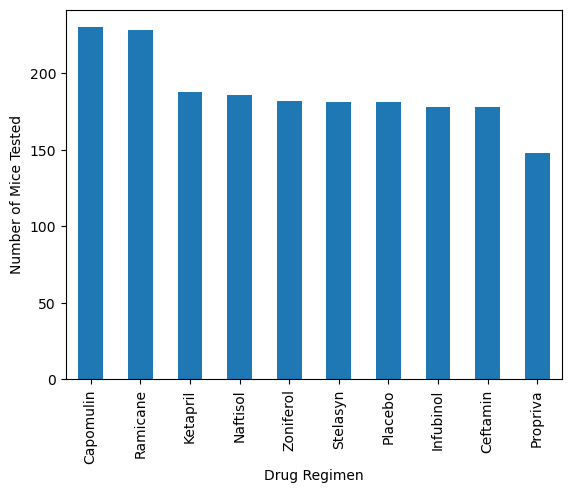

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_mouse = mouse_study['Drug Regimen'].value_counts()
timepoint_mouse.plot(kind = 'bar', xlabel = 'Drug Regimen', ylabel = 'Number of Mice Tested')

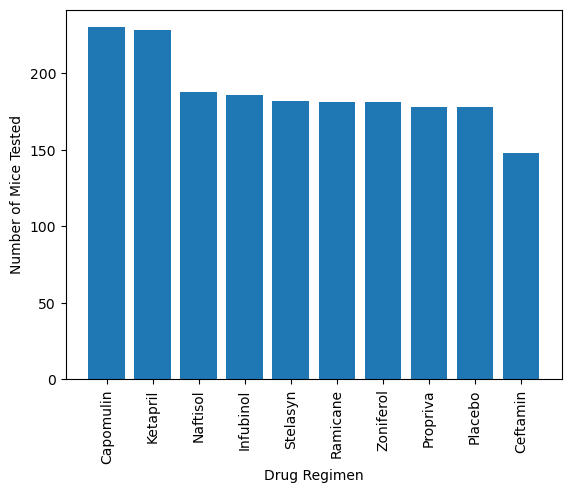

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study['Drug Regimen'].unique()
y_axis = mouse_study['Drug Regimen'].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

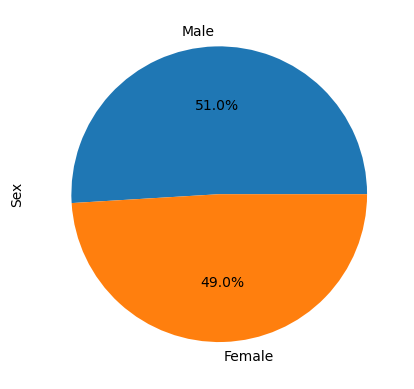

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_count = mouse_study['Sex'].value_counts()
mice_sex_total = mouse_study['Sex'].count()
mice_sex_distribution = mice_sex_count / mice_sex_total

mice_sex_distribution.plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

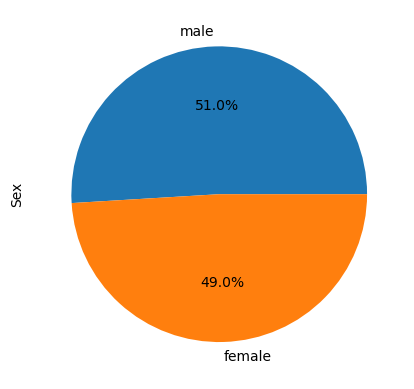

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex_distribution, labels = ['male','female'], autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = mouse_study.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse = max_tumor.merge(mouse_study, on=['Mouse ID','Timepoint'], how ='left')

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merged_mouse.loc[merged_mouse['Drug Regimen'] == each_drug, 'Tumor Volume (mm3)']
    # add subset 
    final_volume_list.append(final_volume)

In [16]:
# Determine outliers using upper and lower bounds
median_list = []
for i in range(len(final_volume_list)):
    median = np.percentile(final_volume_list[i], 50)
    median_list.append(median)

lower_list = []
for i in range(len(final_volume_list)):
    lowerq = np.percentile(final_volume_list[i], 25)
    lower_list.append(lowerq)

upper_list = []
for i in range(len(final_volume_list)):
    upperq = np.percentile(final_volume_list[i], 75)
    upper_list.append(upperq)    

iqr_list = []
for i in range(len(upper_list)):
    iqr = upper_list[i]-lower_list[i]
    iqr_list.append(iqr)

    
iqr_1_5_list = []
for i in range(len(iqr_list)):
    iqr_1_5 = iqr_list[i]*1.5
    iqr_1_5_list.append(iqr_1_5)

lower_bound_list = []
for i in range(len(lower_list)):
    lower_bound = lower_list[i]-iqr_1_5_list[i]
    lower_bound_list.append(lower_bound)

upper_bound_list = []
for i in range(len(upper_list)):
    upper_bound = upper_list[i]+iqr_1_5_list[i]
    upper_bound_list.append(upper_bound)

for i in range(len(final_volume_list)):
    print(f"The interquartile range of {treatment_list[i]} is: {iqr_list[i]}")
    test = ((final_volume_list[i] < lower_bound_list[i]) | (final_volume_list[i] > upper_bound_list[i]))
    outliers = test.loc[test == True]
    print(f"{treatment_list[i]}'s potential outliers are: {outliers}")
    print("----------------------------------------------------")

The interquartile range of Capomulin is: 7.781863460000004
Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: bool)
----------------------------------------------------
The interquartile range of Ramicane is: 9.098536719999998
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: bool)
----------------------------------------------------
The interquartile range of Infubinol is: 11.477135160000003
Infubinol's potential outliers are: 31    True
Name: Tumor Volume (mm3), dtype: bool
----------------------------------------------------
The interquartile range of Ceftamin is: 15.577752179999997
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: bool)
----------------------------------------------------


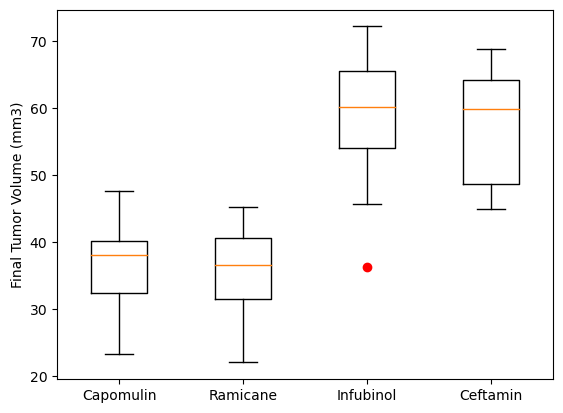

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_volume_list, sym = 'r', labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

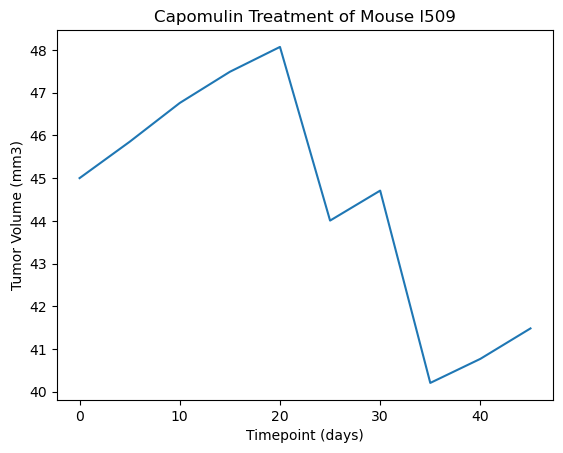

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_tumor = mouse_study.loc[mouse_study['Mouse ID'] == 'l509', 'Tumor Volume (mm3)']
l509_time = mouse_study.loc[mouse_study['Mouse ID'] == 'l509', 'Timepoint']


plt.plot(l509_time, l509_tumor)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

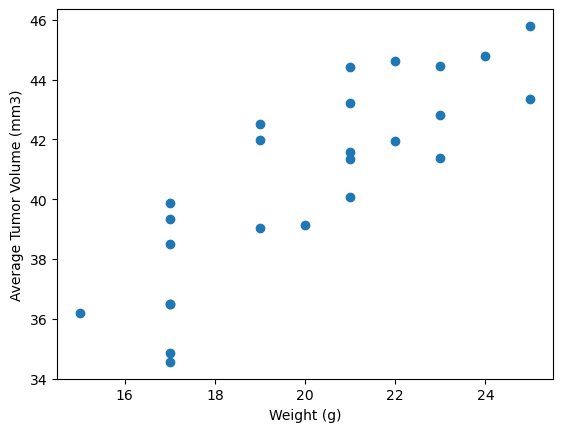

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
capo_tumor_mean = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
capo_weight = capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()
plt.scatter(capo_weight, capo_tumor_mean)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


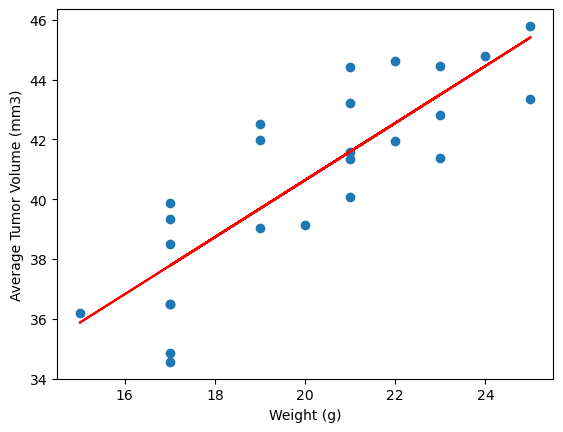

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

m = st.linregress(capo_weight, capo_tumor_mean)[0]
b = st.linregress(capo_weight, capo_tumor_mean)[1]
r = st.linregress(capo_weight, capo_tumor_mean)[2]

print(f'The correlation between mouse weight and the average tumor volume is {round(r,2)}')

plt.scatter(capo_weight, capo_tumor_mean)
plt.plot(capo_weight, m*capo_weight+b,'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()